In [42]:
import numpy as np
import nibabel as nib
%matplotlib inline
import matplotlib.pyplot as plt
import albumentations as ab
from scipy.ndimage.filters import gaussian_filter, sobel
import skimage.transform as skTrans
import matplotlib.colors as matcolors

In [123]:
def load_image(file_path):
    return np.load(file_path)[0,:,:,:,:]

def show_image(image, label, pred, index=0, axis=0):
    if axis == 0:
        image = image[index, :, :]
        label = label[index, :, :]
        pred = pred[index, :, :]
    elif axis == 1:
        image = image[:, index, :]
        label = label[:, index, :]
        pred = pred[:, index, :]
    else:
        image = image[:, :, index]
        label = label[:, :, index]
        pred = pred[:, :, index]
    
    colors = ["black","red", "blue"]
    cmap = matcolors.ListedColormap(colors)
    
    masked_label = np.ma.masked_where(label == 0.0, label)
    masked_pred = np.ma.masked_where(pred == 0.0, pred)

    plt.figure(figsize = (12, 6))
    plt.subplot(1,2,1)
    plt.imshow(image, interpolation='none')
    plt.imshow(masked_label, cmap=cmap, interpolation='none', vmin=0.0, vmax=2.0)
    
    plt.subplot(1,2,2)
    plt.imshow(image, interpolation='none')
    plt.imshow(masked_pred, cmap=cmap, interpolation='none', vmin=0.0, vmax=2.0)
    
    plt.show()

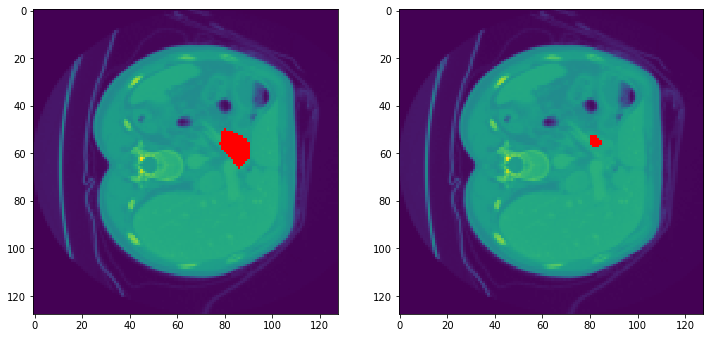

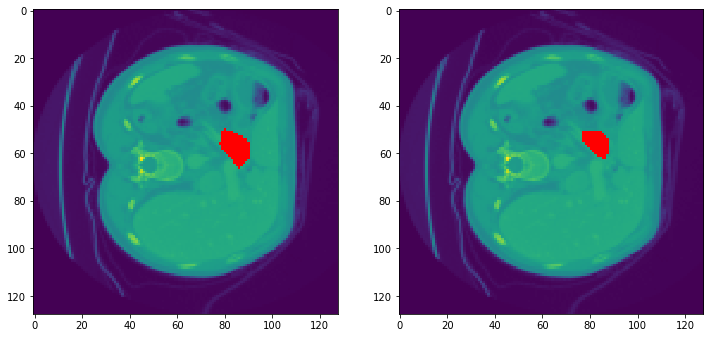

In [124]:
image = load_image(f"/Users/d070867/Desktop/Thesis/results/image.npy")

label = load_image(f"/Users/d070867/Desktop/Thesis/results/label.npy")
label = np.argmax(label, axis=-1)

pred = load_image(f"/Users/d070867/Desktop/Thesis/results/pred.npy")
pred = np.argmax(pred, axis=-1)

pred_dropout = load_image(f"/Users/d070867/Desktop/Thesis/results/pred_dropout.npy")
pred_dropout = np.argmax(pred_dropout, axis=-1)

show_image(image,label,pred,78,2)
show_image(image,label,pred_dropout,78,2)
